In [42]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

import torch

import utils
from utils import ext_transforms as et

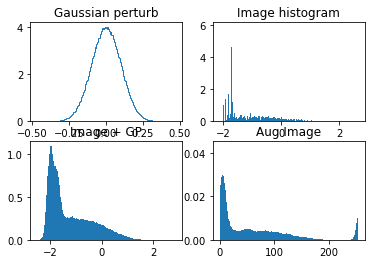

In [64]:
img = Image.open('/data1/sdi/datasets/CPN_all/Images/FH_I0000916_2.bmp').convert('RGB')

ext_trans = [ et.ExtToTensor(), 
                et.ExtNormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                et.GaussianPerturb(mean=0, std=0.1) ]

def genImage(im):
    denorm = utils.Denormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return (denorm(im.numpy()) * 255).transpose(1, 2, 0).astype(np.uint8)

pic, _ = ext_trans[0](img, img)
pic, _ = ext_trans[1](pic, _)
gp = np.random.normal(0, 0.1, np.shape(pic.numpy()))
tmp = pic + torch.from_numpy(gp)

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(gp.flatten(), bins=255, density=True, align='mid', histtype='step')
axs[0, 0].set_title('Gaussian perturb')
axs[0, 1].hist(np.array(pic, dtype=np.float32).flatten(), bins=255, density=True, align='mid')
axs[0, 1].set_title('Image histogram')
axs[1, 0].hist(np.array(tmp, dtype=np.float32).flatten(), bins=255, density=True, align='mid')
axs[1, 0].set_title('Image + GP')
axs[1, 1].hist(genImage(tmp).flatten(), bins=[i for i in range(255)], density=True, align='mid')
axs[1, 1].set_title('Aug Image')
plt.show()

In [35]:
np.array(pic, dtype=np.float32).flatten().shape

(656154,)